Philippe Joly 2025-06-05

# CPU/GPU Output Comparison

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [34]:
fns = [
    # "/project/s/sievers/mohanagr/xcorr_axion/xcorr_all_ant_4bit_1721361571_14336_64_15326_0_120.npz",
    "/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361571_14336_64_468_6_7.npz",
    "/project/s/sievers/philj0ly/xcorr_gpu/xcorr_all_ant_4bit_1721361571_14336_64_468_6_7.npz",
]

data = []
mask = []
missing_fraction = []
chans = []

for fn in fns:
    with np.load(fn) as f:
        data.append(f['data'])
        mask.append(f['mask'])
        missing_fraction.append(f["missing_fraction"])
        chans.append(f['chans'])

data = np.array(data)
mask = np.array(mask)
missing_fraction = np.array(missing_fraction)
chans = np.array(chans)

In [ ]:
# with np.load("/project/s/sievers/mohanagr/xcorr_axion/xcorr_all_ant_4bit_1721361571_14336_64_15326_0_120.npz"):
#     data_og = f['data']
#     mask_og = f['mask']
#     missing_fraction = f['missing_fraction']
#     chans = f['chans']

In [6]:
df_record = 125e6/2048 # (Hz) frequency range / # of channels
df = df_record/64
N = 14336

##  Data Visualisation

In [8]:
spectra = np.ma.MaskedArray(data=data, mask=mask)
freqs = chans*df # (Hz)

# spectra_og = np.ma.MaskedArray(data=data_og, mask=mask_og)
# freqs_og = chans_og*df 

pu = ['cpu','gpu']

In [8]:
# avg_spectrum = np.mean(np.abs(spectra[0, 0,:,:]), axis=1)

/tmp/ipykernel_239094/909127046.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs[i], np.log10(np.abs(spectra[i,0,0,:,5])), label=pu[i])


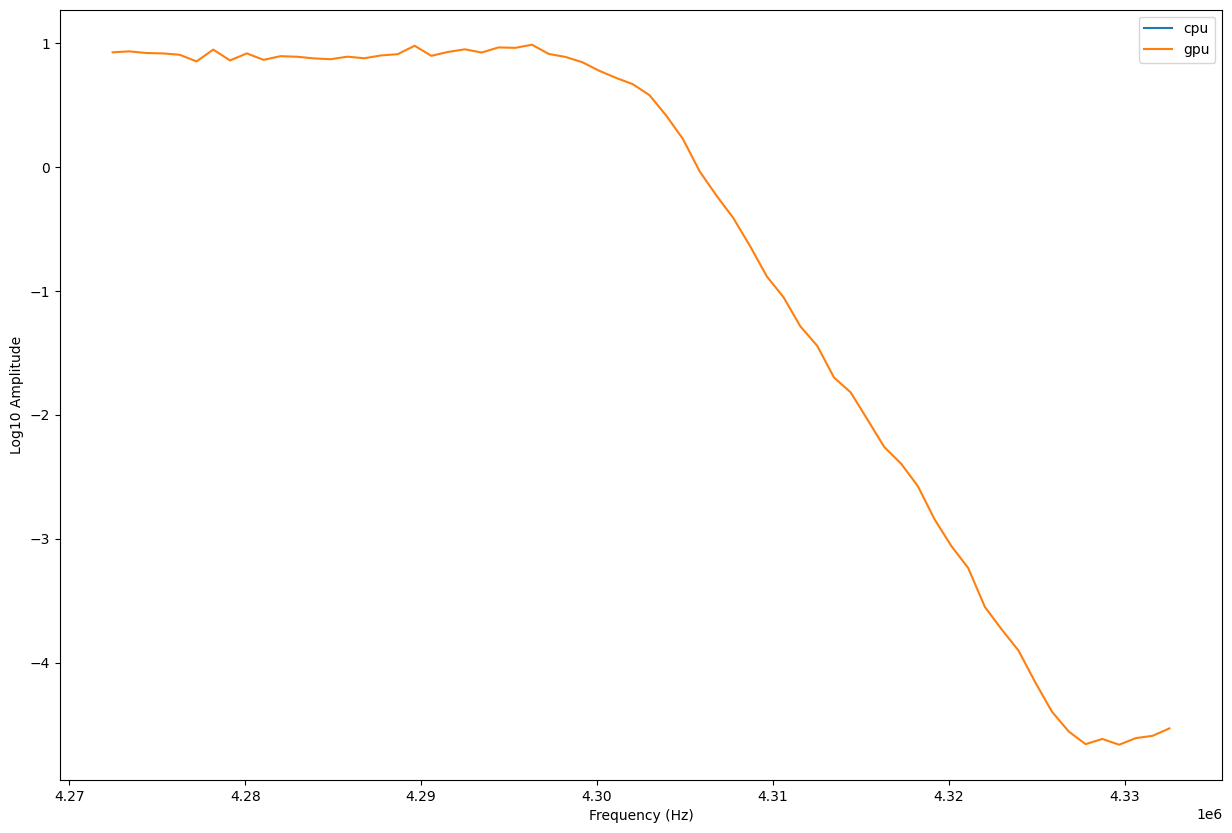

In [33]:
plt.figure(figsize=(15,10))
for i in range(2):    
    plt.plot(freqs[i], np.log10(np.abs(spectra[i,0,0,:,5])), label=pu[i])


# plt.plot(freqs_og, np.log10(np.abs(spectra_og[0,0,:,5])), label="Original")

# plt.ylim(0,5)

plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()

This plot illustrates data amplitude across frequencies at particular times.

/tmp/ipykernel_190153/1343418243.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(times, np.log10(np.abs(spectra[0,0,(i+1)*100, :])))


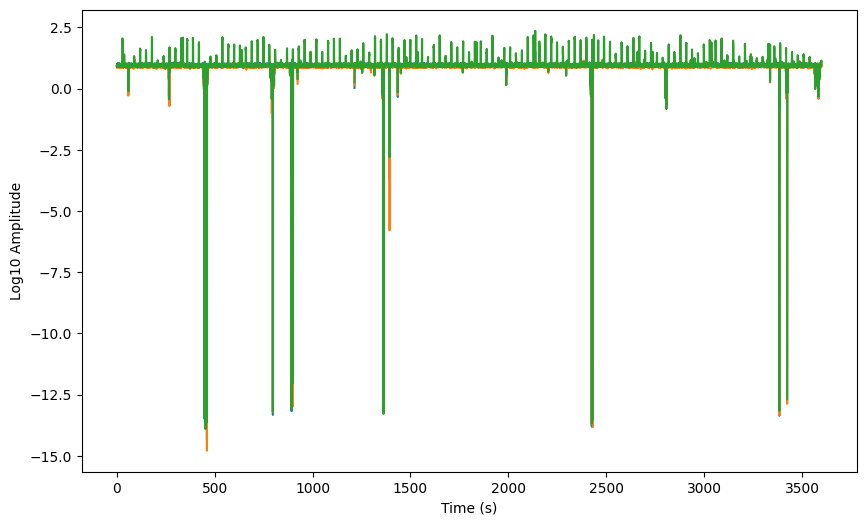

In [10]:
# plt.figure(figsize=(10,6))
# for i in range(3):    
#     plt.plot(times, np.log10(np.abs(spectra[0,0,(i+1)*100, :])))

# plt.xlabel('Time (s)')   
# plt.ylabel('Log10 Amplitude')

# plt.show()

This plot illustrates the data's amplitude at given frequencies across time.